# Taller 04 - Splines Cúbicos

Nombre: Carolay Pillajo

Curso: GR1CC

* Complete el código del siguiente repositorio:


In [3]:
import sympy as sym

def cubic_spline(xs: list[float], ys: list[float]) -> list[sym.Symbol]:
    """
    Cubic spline interpolation ``S``. Every two points are interpolated by a cubic polynomial
    ``S_j`` of the form ``S_j(x) = a_j + b_j(x - x_j) + c_j(x - x_j)^2 + d_j(x - x_j)^3.``

    xs must be different but not necessarily ordered nor equally spaced.

    ## Parameters
    - xs, ys: points to be interpolated

    ## Return
    - List of symbolic expressions for the cubic spline interpolation.
    """

    points = sorted(zip(xs, ys), key=lambda x: x[0])  # sort points by x

    xs = [x for x, _ in points]
    ys = [y for _, y in points]

    n = len(points) - 1  # number of splines

    h = [xs[i + 1] - xs[i] for i in range(n)]  # distances between  contiguous xs

    # Completado
    alpha = [0] * (n + 1)
    
    for i in range(1, n):
        alpha[i] = 3 / h[i] * (ys[i + 1] - ys[i]) - 3 / h[i - 1] * (ys[i] - ys[i - 1])

    l = [1]
    u = [0]
    z = [0]

    for i in range(1, n):
        l += [2 * (xs[i + 1] - xs[i - 1]) - h[i - 1] * u[i - 1]]
        u += [h[i] / l[i]]
        
        # Completado
        z.append((alpha[i] - h[i - 1] * z[i - 1]) / l[i])

    l.append(1)
    z.append(0)
    c = [0] * (n + 1)

    x = sym.Symbol("x")
    splines = []
    for j in range(n - 1, -1, -1):
        c[j] = z[j] - u[j] * c[j + 1]
        b = (ys[j + 1] - ys[j]) / h[j] - h[j] * (c[j + 1] + 2 * c[j]) / 3
        d = (c[j + 1] - c[j]) / (3 * h[j])
        
        # Completado
        a = ys[j]
        
        # Completado
        S = a + b * (x - xs[j]) + c[j] * (x - xs[j])**2 + d * (x - xs[j])**3

        splines.append(S)
    splines.reverse()
    return splines

In [4]:
xs = [0, 1, 2]
ys = [-5, -4, 3]

splines = cubic_spline(xs=xs, ys=ys)
_ = [display(s) for s in splines]
print("______")
_ = [display(s.expand()) for s in splines]

1.5*x**3 - 0.5*x - 5

4.0*x - 1.5*(x - 1)**3 + 4.5*(x - 1)**2 - 8.0

______


1.5*x**3 - 0.5*x - 5

-1.5*x**3 + 9.0*x**2 - 9.5*x - 2.0

* Compruebe gráficamente la solución de los siguientes ejercicios:

* Para cada uno de los ejercicios anteriores, resuelva los splines cúbicos de frontera condicionada con $B_0=1$ para todos los valores de $B_1 ∈ R$

1. $(0, 1), (1, 5), (2, 3)$

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


 ECUACIONES DEL SPLINE CÚBICO (forma ax^3 + bx^2 + cx + d)
Intervalo [0, 1]:
 S0(x) = -6.250000·(x - 0)^3 + 9.250000·(x - 0)^2 + 1.000000·(x - 0) + 1.000000

Intervalo [1, 2]:
 S1(x) = 6.750000·(x - 1)^3 + -9.500000·(x - 1)^2 + 0.750000·(x - 1) + 5.000000



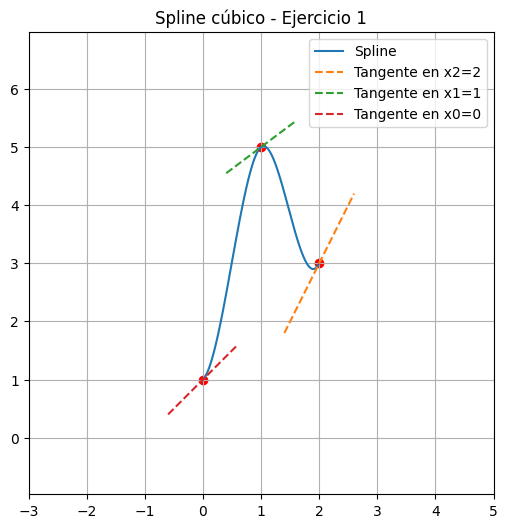

C:\Users\PC\AppData\Local\Temp\ipykernel_2624\801280849.py:92: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(buf))


GIF creado: spline_eje1.gif


In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
import imageio
from io import BytesIO

x = np.array([0, 1, 2])
y = np.array([1, 5, 3])

B0 = 1
xt = 2

xx = np.linspace(0, 2, 300)

T = 0.6
dt = np.linspace(-T, T, 50)

def imprimir_ecuaciones_spline(cs):
    print(" ECUACIONES DEL SPLINE CÚBICO (forma ax^3 + bx^2 + cx + d)")

    for i in range(len(cs.c.T)):
        a3 = cs.c[0, i]
        a2 = cs.c[1, i]
        a1 = cs.c[2, i]
        a0 = cs.c[3, i]

        print(f"Intervalo [{x[i]}, {x[i+1]}]:")
        print(f" S{i}(x) = {a3:.6f}·(x - {x[i]})^3 "
              f"+ {a2:.6f}·(x - {x[i]})^2 "
              f"+ {a1:.6f}·(x - {x[i]}) "
              f"+ {a0:.6f}\n")

B1_fijo = 2
cs = CubicSpline(x, y, bc_type=((1, B0), (1, B1_fijo)))
yy = cs(xx)

imprimir_ecuaciones_spline(cs)

def tangente(cs, xp):
    slope = cs(xp, 1)
    tx = xp + dt
    ty = cs(xp) + slope * dt
    return tx, ty

t2x, t2y = tangente(cs, 2)
t1x, t1y = tangente(cs, 1)
t0x, t0y = tangente(cs, 0)

plt.figure(figsize=(6, 6))
plt.plot(xx, yy, label="Spline")
plt.plot(t2x, t2y, '--', label="Tangente en x2=2")
plt.plot(t1x, t1y, '--', label="Tangente en x1=1")
plt.plot(t0x, t0y, '--', label="Tangente en x0=0")
plt.scatter(x, y, c='red')
plt.axis("equal")
plt.xlim(-3, 5)
plt.ylim(min(y)-4, max(y)+4)
plt.grid()
plt.legend()
plt.title("Spline cúbico - Ejercicio 1")
plt.show()

frames = []
valores_B1 = np.linspace(-5, 5, 50)

for B1 in valores_B1:

    cs = CubicSpline(x, y, bc_type=((1, B0), (1, B1)))
    yy = cs(xx)

    t2x, t2y = tangente(cs, 2)
    t1x, t1y = tangente(cs, 1)
    t0x, t0y = tangente(cs, 0)

    fig, ax = plt.subplots(figsize=(6, 6))
    ax.plot(xx, yy, label="Spline")
    ax.plot(t2x, t2y, '--', label=f"Tangente x2=2  B1={B1:.2f}")
    ax.plot(t1x, t1y, '--', label="Tangente x1=1")
    ax.plot(t0x, t0y, '--', label="Tangente x0=0")
    ax.scatter(x, y, c="red")
    ax.set_xlim(-3, 5)
    ax.set_ylim(min(y)-4, max(y)+4)
    ax.set_aspect("equal", adjustable="box")
    ax.grid()
    ax.legend()
    ax.set_title("Spline cúbico - Ejercicio 1")

    buf = BytesIO()
    fig.savefig(buf, format="png")
    plt.close(fig)
    buf.seek(0)
    frames.append(imageio.imread(buf))
    buf.close()

imageio.mimsave("spline_eje1.gif", frames, duration=0.10)

print("GIF creado: spline_eje1.gif")


2. $(0, -5), (1, -4), (2, 3)$

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


 ECUACIONES DEL SPLINE CÚBICO (forma ax^3 + bx^2 + cx + d)
Intervalo [0, 1]:
 S0(x) = 4.250000·(x - 0)^3 + -4.250000·(x - 0)^2 + 1.000000·(x - 0) + -5.000000

Intervalo [1, 2]:
 S1(x) = -6.750000·(x - 1)^3 + 8.500000·(x - 1)^2 + 5.250000·(x - 1) + -4.000000



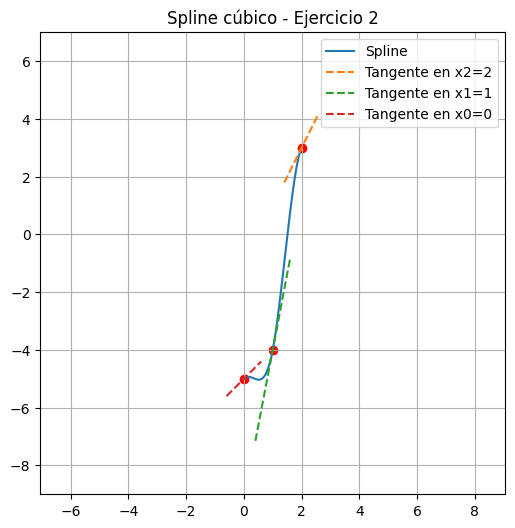

C:\Users\PC\AppData\Local\Temp\ipykernel_2624\4123057223.py:88: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(buf))


GIF creado: spline_eje2.gif


In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
import imageio
from io import BytesIO

x = np.array([0, 1, 2])
y = np.array([-5, -4, 3])

B0 = 1
xt = 2

xx = np.linspace(0, 2, 300)
T = 0.6
dt = np.linspace(-T, T, 50)

def imprimir_ecuaciones_spline(cs):
    print(" ECUACIONES DEL SPLINE CÚBICO (forma ax^3 + bx^2 + cx + d)")

    for i in range(len(cs.c.T)):
        a3 = cs.c[0, i]
        a2 = cs.c[1, i]
        a1 = cs.c[2, i]
        a0 = cs.c[3, i]
        print(f"Intervalo [{x[i]}, {x[i+1]}]:")
        print(f" S{i}(x) = {a3:.6f}·(x - {x[i]})^3 "
              f"+ {a2:.6f}·(x - {x[i]})^2 "
              f"+ {a1:.6f}·(x - {x[i]}) "
              f"+ {a0:.6f}\n")

B1_fijo = 2
cs = CubicSpline(x, y, bc_type=((1, B0), (1, B1_fijo)))
yy = cs(xx)

imprimir_ecuaciones_spline(cs)

def tangente(cs, xp):
    slope = cs(xp, 1)
    tx = xp + dt
    ty = cs(xp) + slope * dt
    return tx, ty

t2x, t2y = tangente(cs, 2)
t1x, t1y = tangente(cs, 1)
t0x, t0y = tangente(cs, 0)

plt.figure(figsize=(6, 6))
plt.plot(xx, yy, label="Spline")
plt.plot(t2x, t2y, '--', label="Tangente en x2=2")
plt.plot(t1x, t1y, '--', label="Tangente en x1=1")
plt.plot(t0x, t0y, '--', label="Tangente en x0=0")
plt.scatter(x, y, c='red')
plt.axis("equal")
plt.xlim(-3, 5)
plt.ylim(min(y)-4, max(y)+4)
plt.grid()
plt.legend()
plt.title("Spline cúbico - Ejercicio 2")
plt.show()

frames = []
valores_B1 = np.linspace(-5, 5, 50)

for B1 in valores_B1:
    cs = CubicSpline(x, y, bc_type=((1, B0), (1, B1)))
    yy = cs(xx)
    t2x, t2y = tangente(cs, 2)
    t1x, t1y = tangente(cs, 1)
    t0x, t0y = tangente(cs, 0)

    fig, ax = plt.subplots(figsize=(6, 6))
    ax.plot(xx, yy, label="Spline")
    ax.plot(t2x, t2y, '--', label=f"Tangente x2=2  B1={B1:.2f}")
    ax.plot(t1x, t1y, '--', label="Tangente x1=1")
    ax.plot(t0x, t0y, '--', label="Tangente x0=0")
    ax.scatter(x, y, c="red")
    ax.set_xlim(-3, 5)
    ax.set_ylim(min(y)-4, max(y)+4)
    ax.set_aspect("equal", adjustable="box")
    ax.grid()
    ax.legend()
    ax.set_title("Spline cúbico - Ejercicio 2")

    buf = BytesIO()
    fig.savefig(buf, format="png")
    plt.close(fig)
    buf.seek(0)
    frames.append(imageio.imread(buf))
    buf.close()

imageio.mimsave("spline_eje2.gif", frames, duration=0.10)
print("GIF creado: spline_eje2.gif")


3. $(0, -1), (1, 1), (2, 5), (3, 2)$

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


 ECUACIONES DEL SPLINE CÚBICO (forma ax^3 + bx^2 + cx + d)
Intervalo [0, 1]:
 S0(x) = 1.466667·(x - 0)^3 + -0.466667·(x - 0)^2 + 1.000000·(x - 0) + -1.000000

Intervalo [1, 2]:
 S1(x) = -4.400000·(x - 1)^3 + 3.933333·(x - 1)^2 + 4.466667·(x - 1) + 1.000000

Intervalo [2, 3]:
 S2(x) = 7.133333·(x - 2)^3 + -9.266667·(x - 2)^2 + -0.866667·(x - 2) + 5.000000



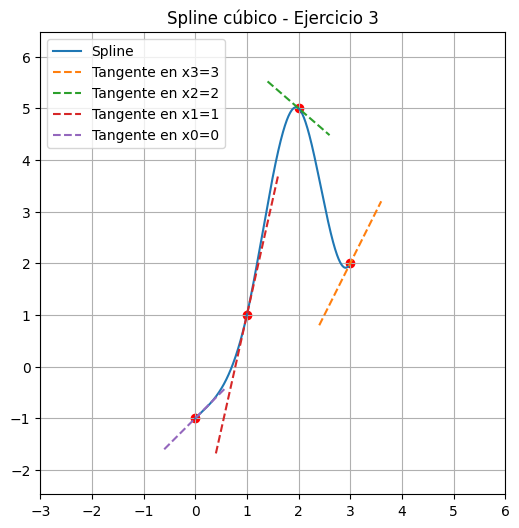

C:\Users\PC\AppData\Local\Temp\ipykernel_2624\2204676372.py:92: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(buf))


GIF creado: spline_eje3.gif


In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
import imageio
from io import BytesIO

x = np.array([0, 1, 2, 3])
y = np.array([-1, 1, 5, 2])

B0 = 1
xt = 3

xx = np.linspace(0, 3, 400)
T = 0.6
dt = np.linspace(-T, T, 50)

def imprimir_ecuaciones_spline(cs):
    print(" ECUACIONES DEL SPLINE CÚBICO (forma ax^3 + bx^2 + cx + d)")
    
    for i in range(len(cs.c.T)):
        a3 = cs.c[0, i]
        a2 = cs.c[1, i]
        a1 = cs.c[2, i]
        a0 = cs.c[3, i]
        print(f"Intervalo [{x[i]}, {x[i+1]}]:")
        print(f" S{i}(x) = {a3:.6f}·(x - {x[i]})^3 "
              f"+ {a2:.6f}·(x - {x[i]})^2 "
              f"+ {a1:.6f}·(x - {x[i]}) "
              f"+ {a0:.6f}\n")

B1_fijo = 2
cs = CubicSpline(x, y, bc_type=((1, B0), (1, B1_fijo)))
yy = cs(xx)

imprimir_ecuaciones_spline(cs)

def tangente(cs, xp):
    slope = cs(xp, 1)
    tx = xp + dt
    ty = cs(xp) + slope * dt
    return tx, ty

t3x, t3y = tangente(cs, 3)
t2x, t2y = tangente(cs, 2)
t1x, t1y = tangente(cs, 1)
t0x, t0y = tangente(cs, 0)

plt.figure(figsize=(6, 6))
plt.plot(xx, yy, label="Spline")
plt.plot(t3x, t3y, '--', label="Tangente en x3=3")
plt.plot(t2x, t2y, '--', label="Tangente en x2=2")
plt.plot(t1x, t1y, '--', label="Tangente en x1=1")
plt.plot(t0x, t0y, '--', label="Tangente en x0=0")
plt.scatter(x, y, c='red')
plt.axis("equal")
plt.xlim(-3, 6)
plt.ylim(min(y)-5, max(y)+5)
plt.grid()
plt.legend()
plt.title("Spline cúbico - Ejercicio 3")
plt.show()

frames = []
valores_B1 = np.linspace(-5, 5, 50)

for B1 in valores_B1:
    cs = CubicSpline(x, y, bc_type=((1, B0), (1, B1)))
    yy = cs(xx)
    t3x, t3y = tangente(cs, 3)
    t2x, t2y = tangente(cs, 2)
    t1x, t1y = tangente(cs, 1)
    t0x, t0y = tangente(cs, 0)

    fig, ax = plt.subplots(figsize=(6, 6))
    ax.plot(xx, yy, label="Spline")
    ax.plot(t3x, t3y, '--', label=f"Tangente x3=3  B1={B1:.2f}")
    ax.plot(t2x, t2y, '--', label="Tangente x2=2")
    ax.plot(t1x, t1y, '--', label="Tangente x1=1")
    ax.plot(t0x, t0y, '--', label="Tangente x0=0")
    ax.scatter(x, y, c='red')
    ax.set_xlim(-3, 6)
    ax.set_ylim(min(y)-5, max(y)+5)
    ax.set_aspect("equal", adjustable="box")
    ax.grid()
    ax.legend()
    ax.set_title("Spline cúbico - Ejercicio 3")

    buf = BytesIO()
    fig.savefig(buf, format="png")
    plt.close(fig)
    buf.seek(0)
    frames.append(imageio.imread(buf))
    buf.close()

imageio.mimsave("spline_eje3.gif", frames, duration=0.10)
print("GIF creado: spline_eje3.gif")


* Realice una animación de la variación de los splines cúbicos al variar $B_1$

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
import imageio
from io import BytesIO

x = np.array([0, 1, 2])
y = np.array([-5, -4, 3])

frames = []
xx = np.linspace(-3, 5, 400)
dt = np.linspace(-0.4, 0.4, 50)

def tangente(cs, xp):
    slope = cs(xp, 1)
    tx = xp + dt
    ty = cs(xp) + slope * dt
    return tx, ty

B_vals = np.linspace(-10, 10, 120)

for B1 in B_vals:

    cs = CubicSpline(x, y, bc_type=((1, -2), (1, B1)))
    yy = cs(xx)

    t0x, t0y = tangente(cs, x[0])
    t1x, t1y = tangente(cs, x[1])
    t2x, t2y = tangente(cs, x[2])

    fig, ax = plt.subplots(figsize=(6, 6))

    ax.plot(xx, yy)
    ax.scatter(x, y, c="red")

    ax.plot(t0x, t0y, '--')
    ax.plot(t1x, t1y, '--')
    ax.plot(t2x, t2y, '--')

    ax.text(-2.5, 7, f"B1 = {B1:.2f}", fontsize=12)

    ax.set_xlim(-3, 6)
    ax.set_ylim(-10, 10)
    ax.set_aspect("equal", adjustable="box")
    ax.grid()
    ax.set_title("Spline cúbico variando B1")

    buf = BytesIO()
    fig.savefig(buf, format="png")
    plt.close(fig)
    buf.seek(0)

    frames.append(imageio.imread(buf))
    buf.close()

imageio.mimsave("spline_variando_B1.gif", frames, duration=0.08)

print("GIF creado: spline_variando_B1.gif")


C:\Users\PC\AppData\Local\Temp\ipykernel_2624\937250161.py:53: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(buf))


GIF creado: spline_variando_B1.gif


* Realice una animación al mover el punto $x_1,y_1$

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
import imageio
from io import BytesIO

frames = []

t_vals = np.linspace(0, 2*np.pi, 120)

for t in t_vals:

    x0 = 0
    y0 = 0

    x1 = 1 + 0.6*np.cos(t)
    y1 = 2 + 1.2*np.sin(t)

    x2 = 3
    y2 = 1 + 0.8*np.cos(t + np.pi/2)

    x = np.array([x0, x1, x2])
    y = np.array([y0, y1, y2])

    order = np.argsort(x)
    x = x[order]
    y = y[order]

    xx = np.linspace(min(x)-1, max(x)+1, 400)
    cs = CubicSpline(x, y)
    yy = cs(xx)

    fig, ax = plt.subplots(figsize=(6, 6))

    ax.plot(xx, yy)
    ax.scatter(x, y, c="red")

    ax.text(-1.8, 3.5, f"x1 = {x1:.3f}", fontsize=12)
    ax.text(-1.8, 3.0, f"y1 = {y1:.3f}", fontsize=12)

    ax.set_xlim(-2, 5)
    ax.set_ylim(-4, 4)
    ax.set_aspect("equal", adjustable="box")
    ax.grid()
    ax.set_title("Spline cúbico con movimiento del punto (x1, y1)")

    buf = BytesIO()
    fig.savefig(buf, format="png")
    plt.close(fig)
    buf.seek(0)

    frames.append(imageio.imread(buf))
    buf.close()

imageio.mimsave("spline_movimiento.gif", frames, duration=0.08)

print("GIF creado: spline_movimiento.gif")


C:\Users\PC\AppData\Local\Temp\ipykernel_2624\3379668914.py:52: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(buf))


GIF creado: spline_movimiento.gif
